In [99]:
import pandas as pd
import numpy as np

In [100]:
data = pd.read_csv('predicted_data.csv')

In [101]:
data = data.drop('Unnamed: 0', 1)
data = data.drop('index', 1)
data.set_index(['GAME_DATE', 'HOME', 'AWAY'])
data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

In [102]:
data['odds1_true'] = 1/ pd.to_numeric(data['Odds1'],errors='coerce')
data['odds2_true'] = 1/ pd.to_numeric(data['Odds2'], errors='coerce')
data['odds_total'] = data['odds1_true'] + data['odds2_true']
data['pred_away'] = 1 - pd.to_numeric(data['prediction'], errors='coerce')
data.rename(columns={'prediction': 'pred_home'}, inplace=True)
data

,Results,GAME_DATE,HOME,AWAY,Odds1,Odds2,Score,pred_home,odds1_true,odds2_true,odds_total,pred_away
0,1,2020-08-02,MIN,LAC,5.12,1.19,142:115,0.316580,0.195312,0.840336,1.035649,0.683420
1,0,2013-11-22,DET,ATL,1.59,2.46,89:96,0.349731,0.628931,0.406504,1.035435,0.650269
2,1,2013-03-29,MIN,OKC,4.08,1.26,101:93,0.297141,0.245098,0.793651,1.038749,0.702859
3,0,2016-05-01,LAL,GSW,12.44,1.05,88:109,0.259462,0.080386,0.952381,1.032767,0.740538
4,0,2014-05-04,WAS,CHI,1.74,2.14,78:96,0.551723,0.574713,0.467290,1.042002,0.448277
...,...,...,...,...,...,...,...,...,...,...,...,...
2855,0,2019-07-02,BOS,LAL,1.24,4.33,128:129,0.734544,0.806452,0.230947,1.037398,0.265456
2856,1,2020-08-02,TOR,BKN,1.39,3.15,119:118,0.672449,0.719424,0.317460,1.036885,0.327551
2857,0,2019-03-21,WAS,DEN,4.11,1.26,108:113,0.491913,0.243309,0.793651,1.036960,0.508087
2858,1,2010-12-03,MIA,CHI,1.11,7.29,108:95,0.591313,0.900901,0.137174,1.038075,0.408687


In [103]:
cols = list(data.columns.values)
cols

['Results',
 'GAME_DATE',
 'HOME',
 'AWAY',
 'Odds1',
 'Odds2',
 'Score',
 'pred_home',
 'odds1_true',
 'odds2_true',
 'odds_total',
 'pred_away']

In [104]:
data = data[[
 'GAME_DATE',
 'HOME',
 'AWAY','Score',
 'Odds1',
 'Odds2',
 'odds_total',
 'odds1_true',
 'odds2_true',
 'pred_home',
 'pred_away',
    'Results']]
data.set_index(['GAME_DATE', 'HOME', 'AWAY'], inplace=True)
data

,,,Score,Odds1,Odds2,odds_total,odds1_true,odds2_true,pred_home,pred_away,Results
GAME_DATE,HOME,AWAY,,,,,,,,,
2020-08-02,MIN,LAC,142:115,5.12,1.19,1.035649,0.195312,0.840336,0.316580,0.683420,1
2013-11-22,DET,ATL,89:96,1.59,2.46,1.035435,0.628931,0.406504,0.349731,0.650269,0
2013-03-29,MIN,OKC,101:93,4.08,1.26,1.038749,0.245098,0.793651,0.297141,0.702859,1
2016-05-01,LAL,GSW,88:109,12.44,1.05,1.032767,0.080386,0.952381,0.259462,0.740538,0
2014-05-04,WAS,CHI,78:96,1.74,2.14,1.042002,0.574713,0.467290,0.551723,0.448277,0
...,...,...,...,...,...,...,...,...,...,...,...
2019-07-02,BOS,LAL,128:129,1.24,4.33,1.037398,0.806452,0.230947,0.734544,0.265456,0
2020-08-02,TOR,BKN,119:118,1.39,3.15,1.036885,0.719424,0.317460,0.672449,0.327551,1
2019-03-21,WAS,DEN,108:113,4.11,1.26,1.036960,0.243309,0.793651,0.491913,0.508087,0


In [105]:
percentile = [0.6, 0.7,0.8, 0.9]
for i in percentile:
    print(data.pred_home.quantile(i))

    #print(data.pred_away.quantile(i))

0.5953250288963318
0.6298103272914887
0.6654991507530212
0.7109650075435638


array([[<AxesSubplot:title={'center':'pred_away'}>]], dtype=object)

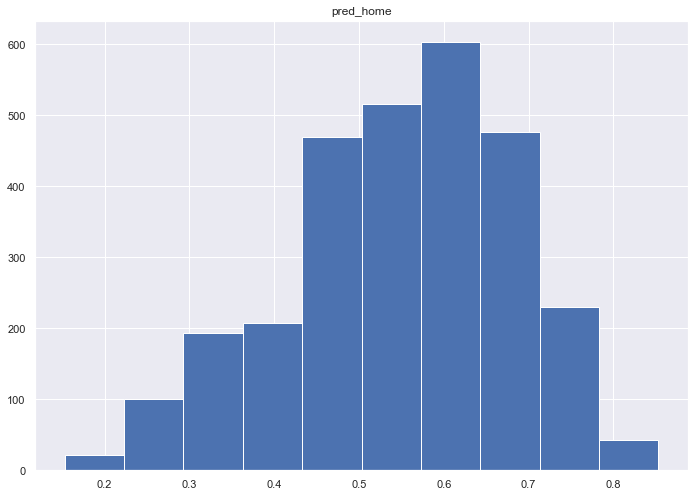

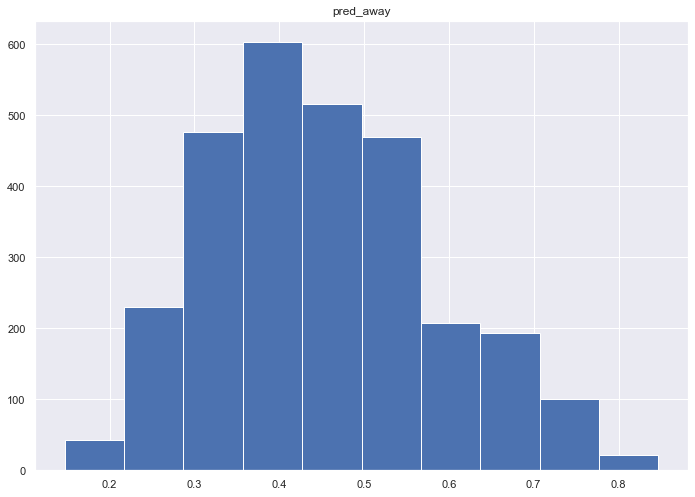

In [106]:
data.hist(column='pred_home')
data.hist(column='pred_away')

In [107]:
#data['pred_home_t'] = np.where(data['pred_home']> 0.5, data['pred_home'], 0.0)
#data['pred_away_t'] = np.where(data['pred_away']> 0.5, data['pred_away'], 0.0)


In [108]:
data[['odds1_true', 'odds2_true']].astype(float)
data['odds1_true_02'] = pd.to_numeric(data['odds1_true'],errors='coerce') + 0.02
data['odds2_true_02'] = pd.to_numeric(data['odds2_true'],errors='coerce') + 0.02

<ipython-input-108-69b6b93bf76c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['odds1_true_02'] = pd.to_numeric(data['odds1_true'],errors='coerce') + 0.02
<ipython-input-108-69b6b93bf76c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['odds2_true_02'] = pd.to_numeric(data['odds2_true'],errors='coerce') + 0.02


In [109]:
data

,,,Score,Odds1,Odds2,odds_total,odds1_true,odds2_true,pred_home,pred_away,Results,odds1_true_02,odds2_true_02
GAME_DATE,HOME,AWAY,,,,,,,,,,,
2020-08-02,MIN,LAC,142:115,5.12,1.19,1.035649,0.195312,0.840336,0.316580,0.683420,1,0.215312,0.860336
2013-11-22,DET,ATL,89:96,1.59,2.46,1.035435,0.628931,0.406504,0.349731,0.650269,0,0.648931,0.426504
2013-03-29,MIN,OKC,101:93,4.08,1.26,1.038749,0.245098,0.793651,0.297141,0.702859,1,0.265098,0.813651
2016-05-01,LAL,GSW,88:109,12.44,1.05,1.032767,0.080386,0.952381,0.259462,0.740538,0,0.100386,0.972381
2014-05-04,WAS,CHI,78:96,1.74,2.14,1.042002,0.574713,0.467290,0.551723,0.448277,0,0.594713,0.487290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-02,BOS,LAL,128:129,1.24,4.33,1.037398,0.806452,0.230947,0.734544,0.265456,0,0.826452,0.250947
2020-08-02,TOR,BKN,119:118,1.39,3.15,1.036885,0.719424,0.317460,0.672449,0.327551,1,0.739424,0.337460
2019-03-21,WAS,DEN,108:113,4.11,1.26,1.036960,0.243309,0.793651,0.491913,0.508087,0,0.263309,0.813651


In [110]:
def roi1h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['pred_home'] >= 0.5 and df['pred_home'] <0.6:
            return df['Results'] * df['Odds1'] * 0 -0
def roi2h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['pred_home']> 0.6 and df['pred_home'] <=0.7:
            return df['Results'] * df['Odds1'] * 2 - 2
def roi3h(df):
    if df['pred_home'] > df['odds1_true_02']:
        if df['pred_home']> 0.7:
            return df['Results'] * df['Odds1'] * 0 -0
def roi1a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away']>= 0.5 and df['pred_away'] <0.6:
            return (1- df['Results']) * df['Odds2'] * 0 -0
def roi2a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away']> 0.6 and df['pred_away'] <=0.7:
            return (1 - df['Results']) * df['Odds2'] * 2 -2
def roi3a(df):
    if df['pred_away'] > df['odds2_true_02']:
        if df['pred_away']> 0.7:
            return (1 - df['Results']) * df['Odds2'] * 0 -0
data = data.sort_values(by='GAME_DATE')
data['roi1h'] = data.apply(roi1h, axis=1)
data['roi2h'] = data.apply(roi2h, axis=1)
data['roi3h'] = data.apply(roi3h, axis=1)
data['roi1a'] = data.apply(roi1a, axis=1)
data['roi2a'] = data.apply(roi2a, axis=1)
data['roi3a'] = data.apply(roi3a, axis=1)
data['roi_total'] = data.fillna(0)['roi1h'] + data.fillna(0)['roi2h'] + data.fillna(0)['roi3h'] + data.fillna(0)['roi1a'] + data.fillna(0)['roi2a'] + data.fillna(0)['roi3a']
data['roi_total_cum'] = data['roi_total'].cumsum()

data


Score  Odds1  Odds2  odds_total  odds1_true  \
GAME_DATE  HOME AWAY                                                  
2008-01-12 CHA  MIN    100:90   1.60   2.35    1.050532    0.625000   
2008-03-12 PHI  LAL   102:114   4.70   1.19    1.053102    0.212766   
           UTA  MIA     89:93   1.46   2.72    1.052579    0.684932   
           WAS  POR     92:98   3.27   1.34    1.052079    0.305810   
2008-05-12 ATL  NYK     98:95   1.12   5.70    1.068296    0.892857   
...                       ...    ...    ...         ...         ...   
2022-12-01 ATL  MIA    91:115   1.72   2.20    1.035941    0.581395   
           SAS  HOU   124:128   1.33   3.48    1.039236    0.751880   
2022-12-02 PHI  CLE    103:93   1.69   2.24    1.038145    0.591716   
2022-12-03 MIA  MIN   104:113   1.62   2.38    1.037452    0.617284   
           DEN  TOR   115:127   1.36   3.33    1.035594    0.735294   

                      odds2_true  pred_home  pred_away  Results  \
GAME_DATE  HOME AWAY                                              
2008-01-12 CHA  MIN     0.425532   0.506133   0.493867        1   
2008-03-12 PHI  LAL     0.840336   0.329021   0.670979        0   
           UTA  MIA     0.367647   0.617261   0.382739        0   
           WAS  POR     0.746269   0.408230   0.591770        0   
2008-05-12 ATL  NYK     0.175439   0.671221   0.328779        1   
...                          ...        ...        ...      ...   
2022-12-01 ATL  MIA     0.454545   0.447900   0.552100        0   
           SAS  HOU     0.287356   0.633763   0.366237        0   
2022-12-02 PHI  CLE     0.446429   0.547056   0.452944        1   
2022-12-03 MIA  MIN     0.420168   0.465961   0.534039        0   
           DEN  TOR     0.300300   0.584249   0.415751        0   

                      odds1_true_02  odds2_true_02  roi1h  roi2h  roi3h  \
GAME_DATE  HOME AWAY                                                      
2008-01-12 CHA  MIN        0.645000       0.445532    NaN    NaN    NaN   
2008-03-12 PHI  LAL        0.232766       0.860336    NaN    NaN    NaN   
           UTA  MIA        0.704932       0.387647    NaN    NaN    NaN   
           WAS  POR        0.325810       0.766269    NaN    NaN    NaN   
2008-05-12 ATL  NYK        0.912857       0.195439    NaN    NaN    NaN   
...                             ...            ...    ...    ...    ...   
2022-12-01 ATL  MIA        0.601395       0.474545    NaN    NaN    NaN   
           SAS  HOU        0.771880       0.307356    NaN    NaN    NaN   
2022-12-02 PHI  CLE        0.611716       0.466429    NaN    NaN    NaN   
2022-12-03 MIA  MIN        0.637284       0.440168    NaN    NaN    NaN   
           DEN  TOR        0.755294       0.320300    NaN    NaN    NaN   

                      roi1a  roi2a  roi3a  roi_total  roi_total_cum  
GAME_DATE  HOME AWAY                                                 
2008-01-12 CHA  MIN     NaN    NaN    NaN        0.0           0.00  
2008-03-12 PHI  LAL     NaN    NaN    NaN        0.0           0.00  
           UTA  MIA     NaN    NaN    NaN        0.0           0.00  
           WAS  POR     NaN    NaN    NaN        0.0           0.00  
2008-05-12 ATL  NYK     NaN    NaN    NaN        0.0           0.00  
...                     ...    ...    ...        ...            ...  
2022-12-01 ATL  MIA     0.0    NaN    NaN        0.0          20.44  
           SAS  HOU     NaN    NaN    NaN        0.0          20.44  
2022-12-02 PHI  CLE     NaN    NaN    NaN        0.0          20.44  
2022-12-03 MIA  MIN     0.0    NaN    NaN        0.0          20.44  
           DEN  TOR     NaN    NaN    NaN        0.0          20.44  

[2860 rows x 19 columns]

In [73]:
data.reset_index(inplace=True)

In [74]:
import matplotlib.pyplot as plt

data['roi_total'] = data['roi_total'].replace(0, np.nan)
data['roi_total_cum'] = data['roi_total'].cumsum()
data['roi1h_cum'] = data['roi1h'].cumsum()
data['roi2h_cum'] = data['roi2h'].cumsum()
data['roi3h_cum'] = data['roi3h'].cumsum()
data['roi1a_cum'] = data['roi1a'].cumsum()
data['roi2a_cum'] = data['roi2a'].cumsum()
data['roi3a_cum'] = data['roi3a'].cumsum()
data_roi = data[['roi1h_cum','roi2h_cum','roi3h_cum','roi1a_cum','roi2a_cum','roi3a_cum','roi_total_cum','GAME_DATE']]


KeyError: 'roi_total'

In [61]:
data_roi.set_index('GAME_DATE', inplace=True)

data_roi

,roi1h_cum,roi2h_cum,roi3h_cum,roi1a_cum,roi2a_cum,roi3a_cum,roi_total_cum
GAME_DATE,,,,,,,
01/01/2013,NaN,NaN,NaN,0.0,NaN,NaN,NaN
01/01/2014,NaN,-2.00,NaN,NaN,NaN,NaN,-2.00
01/01/2014,NaN,NaN,NaN,NaN,-2.0,NaN,-4.00
01/01/2016,NaN,-1.24,NaN,NaN,NaN,NaN,-3.24
01/01/2016,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
31/12/2018,NaN,39.18,NaN,NaN,NaN,NaN,58.62
31/12/2018,NaN,40.26,NaN,NaN,NaN,NaN,59.70
31/12/2019,NaN,NaN,NaN,0.0,NaN,NaN,NaN


<AxesSubplot:xlabel='GAME_DATE'>

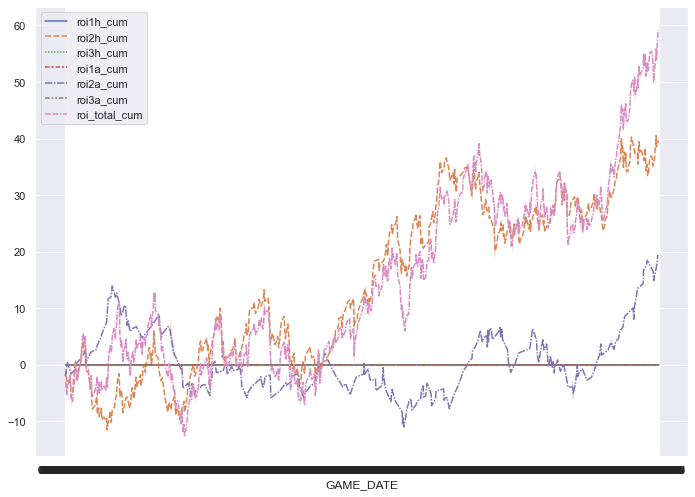

In [62]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=data_roi )

In [85]:
data_roi.to_csv('pred_data_nn_old_data.csv')